<div align="center">

###### Lab 2

# National Tsing Hua University

#### Spring 2025

#### 11320IEEM 513600

#### Deep Learning and Industrial Applications
    
## Lab 2: Predicting Heart Disease with Deep Learning

</div>

### Introduction

In the realm of healthcare, early detection and accurate prediction of diseases play a crucial role in patient care and management. Heart disease remains one of the leading causes of mortality worldwide, making the development of effective diagnostic tools essential. This lab leverages deep learning to predict the presence of heart disease in patients using a subset of 14 key attributes from the Cleveland Heart Disease Database. The objective is to explore and apply deep learning techniques to distinguish between the presence and absence of heart disease based on clinical parameters.

Throughout this lab, you'll engage with the following key activities:
- Use [Pandas](https://pandas.pydata.org) to process the CSV files.
- Use [PyTorch](https://pytorch.org) to build an Artificial Neural Network (ANN) to fit the dataset.
- Evaluate the performance of the trained model to understand its accuracy.

### Attribute Information

1. age: Age of the patient in years
2. sex: (Male/Female)
3. cp: Chest pain type (4 types: low, medium, high, and severe)
4. trestbps: Resting blood pressure
5. chol: Serum cholesterol in mg/dl
6. fbs: Fasting blood sugar > 120 mg/dl
7. restecg: Resting electrocardiographic results (values 0,1,2)
8. thalach: Maximum heart rate achieved
9. exang: Exercise induced angina
10. oldpeak: Oldpeak = ST depression induced by exercise relative to rest
11. slope: The slope of the peak exercise ST segment
12. ca: Number of major vessels (0-3) colored by fluoroscopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
14. target: target have disease or not (1=yes, 0=no)

### References
- [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data) for the dataset we use in this lab.


## A. Checking and Preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NTHU_2025_DLIA_HW/HW2/heart_dataset_train_all.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,Male,medium,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,Female,low,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,Female,medium,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,Female,high,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,Female,severe,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,Female,low,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,Female,low,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,Female,high,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,Female,low,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       273 non-null    int64  
 1   sex       272 non-null    object 
 2   cp        272 non-null    object 
 3   trestbps  272 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       273 non-null    int64  
 6   restecg   272 non-null    float64
 7   thalach   272 non-null    float64
 8   exang     273 non-null    int64  
 9   oldpeak   273 non-null    float64
 10  slope     271 non-null    float64
 11  ca        273 non-null    int64  
 12  thal      272 non-null    float64
 13  target    272 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 30.0+ KB


In [5]:
# checking for null values
df.isnull().sum()

,0
age,0
sex,1
cp,1
trestbps,1
chol,2
fbs,0
restecg,1
thalach,1
exang,0
oldpeak,0


In [6]:
df = df.dropna()

In [7]:
df.shape

(270, 14)

In [8]:
# Mapping 'sex' descriptions to numbers
sex_description = {
    'Male': 0,
    'Female': 1,
}
df.loc[:, 'sex'] = df['sex'].map(sex_description)

# Mapping 'cp' (chest pain) descriptions to numbers
pain_description = {
    'low': 0,
    'medium': 1,
    'high': 2,
    'severe': 3
}
df.loc[:, 'cp'] = df['cp'].map(pain_description)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,0,1,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,1,0,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,1,1,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,1,2,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,1,3,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,1,0,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,1,0,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,1,2,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,1,0,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [9]:
df.describe()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.385185,131.525926,245.607407,0.151852,0.522222,149.807407,0.333333,1.024074,1.400000,0.744444,2.300000,0.544444
std,9.149713,17.904675,51.529411,0.359544,0.529314,23.217253,0.472280,1.188379,0.618188,1.037166,0.623874,0.498946
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,120.000000,210.250000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,140.000000,274.000000,0.000000,1.000000,167.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.062222,-0.103697,0.261782,0.210520,0.109847,-0.124588,-0.412624,0.111263,0.200243,-0.165360,0.254462,0.077368,-0.244798
sex,-0.062222,1.000000,-0.040197,-0.055463,-0.166885,0.042384,-0.069599,-0.058626,0.124054,0.089726,-0.038771,0.140795,0.198493,-0.283776
cp,-0.103697,-0.040197,1.000000,0.035563,-0.063592,0.065869,0.008389,0.300307,-0.428233,-0.183616,0.135174,-0.180598,-0.139765,0.425574
trestbps,0.261782,-0.055463,0.035563,1.000000,0.128444,0.170606,-0.145195,-0.056631,0.067116,0.184896,-0.126553,0.093545,0.068690,-0.173239
chol,0.210520,-0.166885,-0.063592,0.128444,1.000000,0.003430,-0.162687,-0.023753,0.063902,0.084355,-0.031929,0.068647,0.121280,-0.096773
fbs,0.109847,0.042384,0.065869,0.170606,0.003430,1.000000,-0.086165,-0.014297,0.029190,0.007943,-0.056866,0.164266,-0.004972,-0.068845
restecg,-0.124588,-0.069599,0.008389,-0.145195,-0.162687,-0.086165,1.000000,0.025457,-0.089225,-0.047837,0.074982,-0.053946,-0.003377,0.101817
thalach,-0.412624,-0.058626,0.300307,-0.056631,-0.023753,-0.014297,0.025457,1.000000,-0.404349,-0.340564,0.370073,-0.205060,-0.078637,0.432687
exang,0.111263,0.124054,-0.428233,0.067116,0.063902,0.029190,-0.089225,-0.404349,1.000000,0.294308,-0.280124,0.106250,0.189253,-0.457502
oldpeak,0.200243,0.089726,-0.183616,0.184896,0.084355,0.007943,-0.047837,-0.340564,0.294308,1.000000,-0.585472,0.223375,0.200315,-0.443504


#### Converting the DataFrame to a NumPy Array

In [10]:
import numpy as np

np_data = df.values
np_data.shape

(270, 14)

In [11]:
split_point = int(np_data.shape[0]*0.7)

np.random.shuffle(np_data)

x_train = np_data[:split_point, :13]
y_train = np_data[:split_point, 13]
x_val = np_data[split_point:, :13]
y_val = np_data[split_point:, 13]

In [16]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
x_val = np.array(x_val, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)

x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()

x_val = torch.from_numpy(x_val).float()
y_val = torch.from_numpy(y_val).long()

batch_size = 32

# Create datasets
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f'Number of samples in train and validation are {len(train_loader.dataset)} and {len(val_loader.dataset)}.')

Number of samples in train and validation are 189 and 81.


## B. Defining Neural Networks

In PyTorch, we can use **class** to define our custom neural network architectures by subclassing the `nn.Module` class. This gives our neural network all the functionality it needs to work with PyTorch's other utilities and keeps our implementation organized.

- Neural networks are defined by subclassing `nn.Module`.
- The layers of the neural network are initialized in the `__init__` method.
- The forward pass operations on input data are defined in the `forward` method.

It's worth noting that while we only define the forward pass, PyTorch will automatically derive the backward pass for us, which is used during training to update the model's weights."

In [26]:
# orignal defining model so please skip

import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(13, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 2)
        ).cuda()

    def forward(self, x):
        return self.model(x)

In [27]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, hidden_size=256):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(13, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 2)
        ).cuda()

    def forward(self, x):
        return self.model(x)


## C. Training the Neural Network

In [18]:
# Check your GPU status.
!nvidia-smi

Sat Mar 22 03:02:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [19]:
# original training and validation part so please skip

import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR
from tqdm.auto import tqdm

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 100

model = Model()
# print(model)

best_val_loss = float('inf')
best_val_acc = -1

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
lr_scheduler = CosineAnnealingLR(optimizer, T_max=epochs, eta_min=0)

for epoch in tqdm(range(epochs)):
    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for features, labels in train_loader:
        features = features.cuda()
        labels = labels.cuda()

        outputs = model(features)

        loss = criterion(outputs, labels)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    # Learning rate update
    lr_scheduler.step()

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in val_loader:
            features = features.cuda()
            labels = labels.cuda()

            outputs = model(features)

            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    # Checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f} Best Val acc: {best_val_acc:.2f}%')

    # Store performance
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 4.4495, Train acc: 56.0847%, Val loss: 3.0881, Val acc: 48.1481%, Best Val loss: 3.0881 Best Val acc: 48.15%
Epoch 2/100, Train loss: 1.9251, Train acc: 59.2593%, Val loss: 2.0956, Val acc: 49.3827%, Best Val loss: 2.0956 Best Val acc: 49.38%
Epoch 3/100, Train loss: 1.1418, Train acc: 64.5503%, Val loss: 0.9568, Val acc: 59.2593%, Best Val loss: 0.9568 Best Val acc: 59.26%
Epoch 4/100, Train loss: 0.7432, Train acc: 72.4868%, Val loss: 0.9772, Val acc: 55.5556%, Best Val loss: 0.9568 Best Val acc: 59.26%
Epoch 5/100, Train loss: 0.7830, Train acc: 64.0212%, Val loss: 0.6294, Val acc: 61.7284%, Best Val loss: 0.6294 Best Val acc: 61.73%
Epoch 6/100, Train loss: 0.7811, Train acc: 61.9048%, Val loss: 1.2113, Val acc: 53.0864%, Best Val loss: 0.6294 Best Val acc: 61.73%
Epoch 7/100, Train loss: 1.2385, Train acc: 52.9101%, Val loss: 1.1249, Val acc: 56.7901%, Best Val loss: 0.6294 Best Val acc: 61.73%
Epoch 8/100, Train loss: 0.9701, Train acc: 61.3757%, Val loss


Training with Learning Rate: 0.001, Hidden Size: 128
Epoch 1/50, Train Loss: 7.1305, Train Acc: 54.50%, Val Loss: 6.7932, Val Acc: 53.09%
Epoch 2/50, Train Loss: 3.5799, Train Acc: 56.08%, Val Loss: 4.5929, Val Acc: 46.91%
Epoch 3/50, Train Loss: 2.0782, Train Acc: 55.56%, Val Loss: 2.7150, Val Acc: 53.09%
Epoch 4/50, Train Loss: 1.7348, Train Acc: 64.02%, Val Loss: 1.7306, Val Acc: 53.09%
Epoch 5/50, Train Loss: 1.2214, Train Acc: 53.97%, Val Loss: 1.2587, Val Acc: 59.26%
Epoch 6/50, Train Loss: 0.9800, Train Acc: 64.02%, Val Loss: 0.9562, Val Acc: 59.26%
Epoch 7/50, Train Loss: 0.7110, Train Acc: 67.72%, Val Loss: 0.6373, Val Acc: 62.96%
Epoch 8/50, Train Loss: 0.6420, Train Acc: 66.14%, Val Loss: 0.7233, Val Acc: 59.26%
Epoch 9/50, Train Loss: 0.7137, Train Acc: 66.14%, Val Loss: 0.9935, Val Acc: 53.09%
Epoch 10/50, Train Loss: 0.6592, Train Acc: 64.55%, Val Loss: 0.7693, Val Acc: 59.26%
Epoch 11/50, Train Loss: 0.6199, Train Acc: 65.61%, Val Loss: 0.7442, Val Acc: 61.73%
Epoch 12/

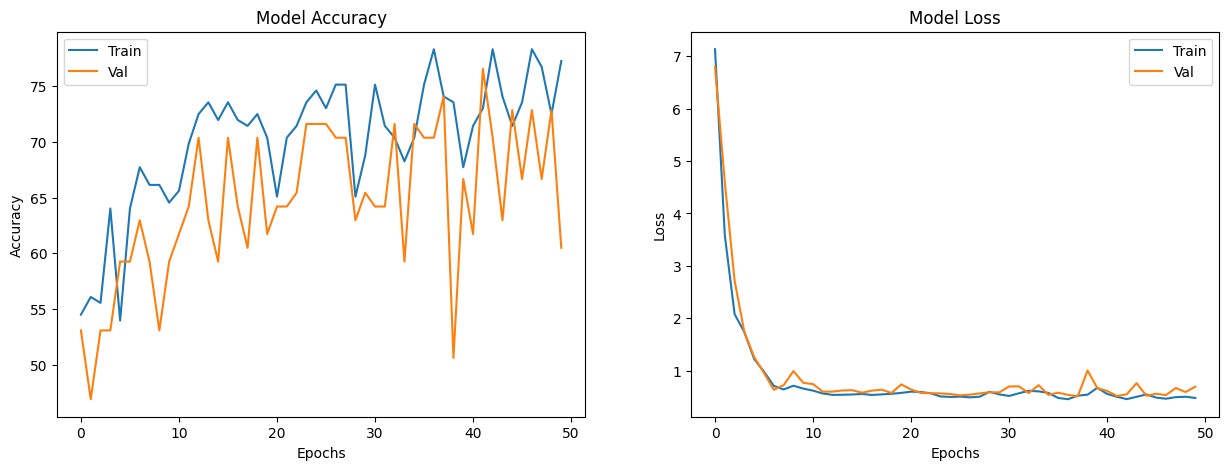


Training with Learning Rate: 0.001, Hidden Size: 256
Epoch 1/50, Train Loss: 3.1538, Train Acc: 53.97%, Val Loss: 0.7239, Val Acc: 50.62%
Epoch 2/50, Train Loss: 0.7758, Train Acc: 55.03%, Val Loss: 0.9472, Val Acc: 59.26%
Epoch 3/50, Train Loss: 0.9276, Train Acc: 58.20%, Val Loss: 1.3480, Val Acc: 56.79%
Epoch 4/50, Train Loss: 0.8710, Train Acc: 62.43%, Val Loss: 1.0806, Val Acc: 58.02%
Epoch 5/50, Train Loss: 0.7441, Train Acc: 68.78%, Val Loss: 0.9573, Val Acc: 58.02%
Epoch 6/50, Train Loss: 0.7183, Train Acc: 68.78%, Val Loss: 0.7131, Val Acc: 64.20%
Epoch 7/50, Train Loss: 0.6253, Train Acc: 65.61%, Val Loss: 0.6987, Val Acc: 62.96%
Epoch 8/50, Train Loss: 0.5465, Train Acc: 68.78%, Val Loss: 0.6708, Val Acc: 64.20%
Epoch 9/50, Train Loss: 0.6993, Train Acc: 67.72%, Val Loss: 0.8223, Val Acc: 59.26%
Epoch 10/50, Train Loss: 0.6788, Train Acc: 69.31%, Val Loss: 0.8997, Val Acc: 56.79%
Epoch 11/50, Train Loss: 0.8863, Train Acc: 62.43%, Val Loss: 0.7679, Val Acc: 62.96%
Epoch 12/

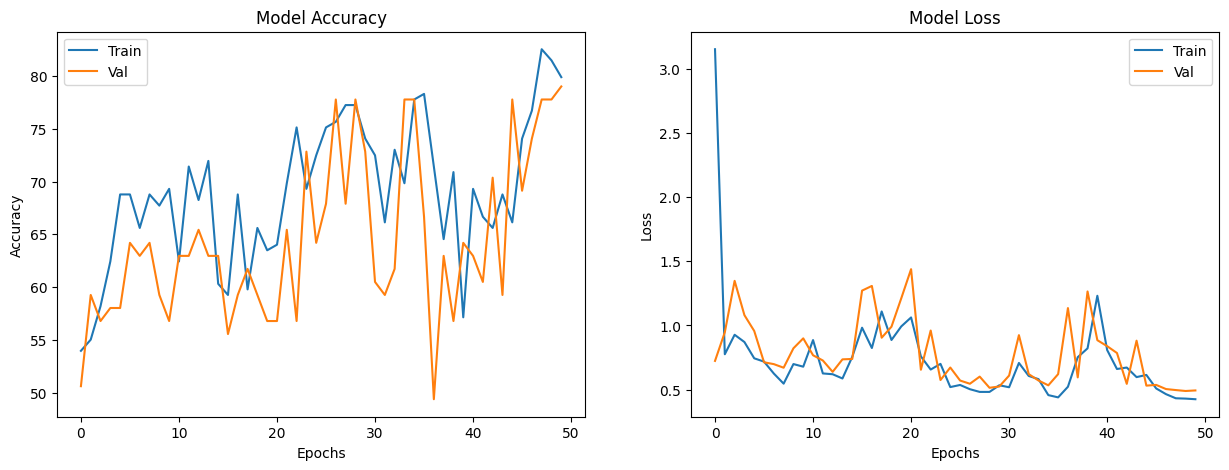


Training with Learning Rate: 0.001, Hidden Size: 512
Epoch 1/50, Train Loss: 15.2658, Train Acc: 56.61%, Val Loss: 8.8620, Val Acc: 51.85%
Epoch 2/50, Train Loss: 7.1656, Train Acc: 56.61%, Val Loss: 7.1503, Val Acc: 58.02%
Epoch 3/50, Train Loss: 5.0175, Train Acc: 62.96%, Val Loss: 4.7729, Val Acc: 55.56%
Epoch 4/50, Train Loss: 2.3430, Train Acc: 66.67%, Val Loss: 3.2647, Val Acc: 58.02%
Epoch 5/50, Train Loss: 1.7511, Train Acc: 66.67%, Val Loss: 1.3726, Val Acc: 65.43%
Epoch 6/50, Train Loss: 1.3118, Train Acc: 68.25%, Val Loss: 2.0782, Val Acc: 55.56%
Epoch 7/50, Train Loss: 1.1638, Train Acc: 67.20%, Val Loss: 0.6813, Val Acc: 69.14%
Epoch 8/50, Train Loss: 0.9160, Train Acc: 65.61%, Val Loss: 0.9763, Val Acc: 58.02%
Epoch 9/50, Train Loss: 0.8782, Train Acc: 64.02%, Val Loss: 1.0705, Val Acc: 61.73%
Epoch 10/50, Train Loss: 0.7635, Train Acc: 64.02%, Val Loss: 0.6145, Val Acc: 65.43%
Epoch 11/50, Train Loss: 0.5999, Train Acc: 67.72%, Val Loss: 0.7730, Val Acc: 58.02%
Epoch 12

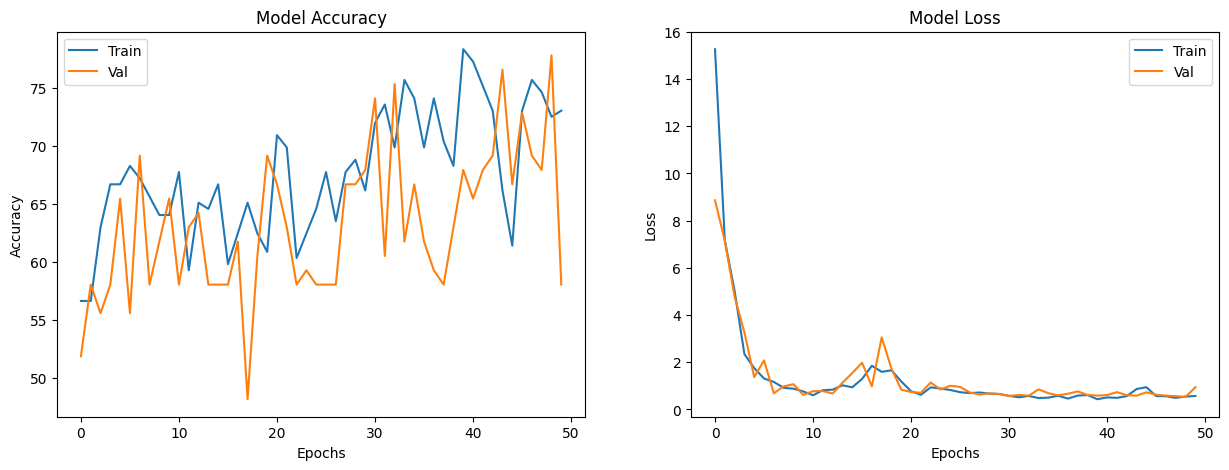


Training with Learning Rate: 0.0005, Hidden Size: 128
Epoch 1/50, Train Loss: 2.3137, Train Acc: 52.38%, Val Loss: 1.0838, Val Acc: 53.09%
Epoch 2/50, Train Loss: 0.9131, Train Acc: 59.79%, Val Loss: 1.2934, Val Acc: 50.62%
Epoch 3/50, Train Loss: 0.9212, Train Acc: 62.43%, Val Loss: 0.8840, Val Acc: 58.02%
Epoch 4/50, Train Loss: 0.7111, Train Acc: 66.14%, Val Loss: 0.6648, Val Acc: 60.49%
Epoch 5/50, Train Loss: 0.6152, Train Acc: 68.25%, Val Loss: 0.6135, Val Acc: 67.90%
Epoch 6/50, Train Loss: 0.5836, Train Acc: 71.96%, Val Loss: 0.5806, Val Acc: 59.26%
Epoch 7/50, Train Loss: 0.5722, Train Acc: 69.31%, Val Loss: 0.5732, Val Acc: 64.20%
Epoch 8/50, Train Loss: 0.5686, Train Acc: 70.90%, Val Loss: 0.6395, Val Acc: 61.73%
Epoch 9/50, Train Loss: 0.5637, Train Acc: 69.31%, Val Loss: 0.5796, Val Acc: 70.37%
Epoch 10/50, Train Loss: 0.5798, Train Acc: 69.84%, Val Loss: 0.6354, Val Acc: 58.02%
Epoch 11/50, Train Loss: 0.5592, Train Acc: 71.96%, Val Loss: 0.5833, Val Acc: 67.90%
Epoch 12

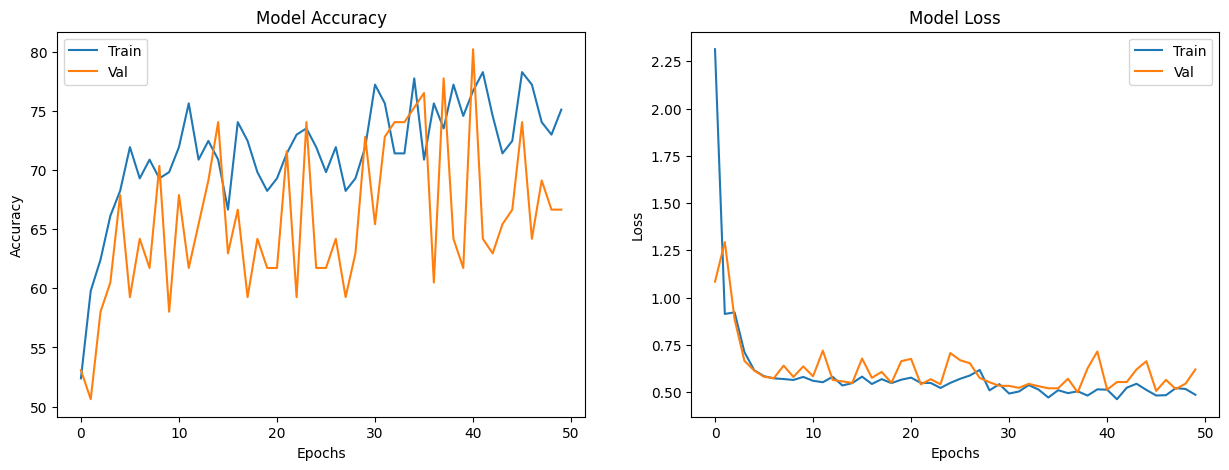


Training with Learning Rate: 0.0005, Hidden Size: 256
Epoch 1/50, Train Loss: 3.3832, Train Acc: 46.56%, Val Loss: 1.2012, Val Acc: 55.56%
Epoch 2/50, Train Loss: 1.3602, Train Acc: 54.50%, Val Loss: 1.2694, Val Acc: 50.62%
Epoch 3/50, Train Loss: 0.9144, Train Acc: 66.14%, Val Loss: 1.0097, Val Acc: 54.32%
Epoch 4/50, Train Loss: 0.6876, Train Acc: 65.08%, Val Loss: 0.7554, Val Acc: 58.02%
Epoch 5/50, Train Loss: 0.5829, Train Acc: 69.84%, Val Loss: 0.6134, Val Acc: 67.90%
Epoch 6/50, Train Loss: 0.5707, Train Acc: 70.37%, Val Loss: 0.6788, Val Acc: 60.49%
Epoch 7/50, Train Loss: 0.6330, Train Acc: 64.02%, Val Loss: 0.5974, Val Acc: 75.31%
Epoch 8/50, Train Loss: 0.6529, Train Acc: 65.61%, Val Loss: 0.6386, Val Acc: 60.49%
Epoch 9/50, Train Loss: 0.5903, Train Acc: 70.37%, Val Loss: 0.6535, Val Acc: 60.49%
Epoch 10/50, Train Loss: 0.6090, Train Acc: 67.72%, Val Loss: 0.6092, Val Acc: 60.49%
Epoch 11/50, Train Loss: 0.5523, Train Acc: 68.78%, Val Loss: 0.6074, Val Acc: 60.49%
Epoch 12

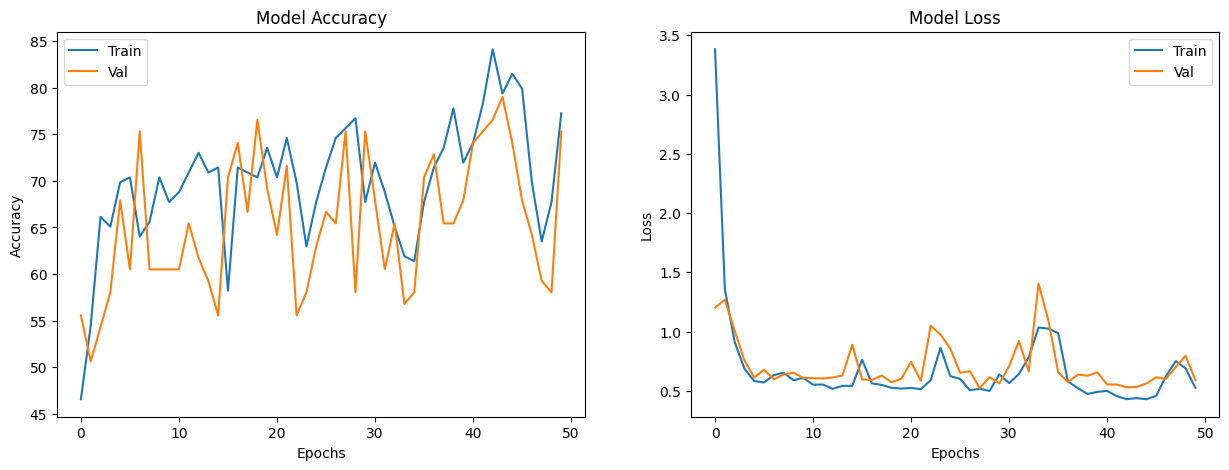


Training with Learning Rate: 0.0005, Hidden Size: 512
Epoch 1/50, Train Loss: 8.9752, Train Acc: 48.15%, Val Loss: 4.2547, Val Acc: 46.91%
Epoch 2/50, Train Loss: 3.0715, Train Acc: 48.15%, Val Loss: 3.8704, Val Acc: 49.38%
Epoch 3/50, Train Loss: 2.1094, Train Acc: 57.14%, Val Loss: 1.4106, Val Acc: 54.32%
Epoch 4/50, Train Loss: 1.2257, Train Acc: 64.02%, Val Loss: 1.2918, Val Acc: 60.49%
Epoch 5/50, Train Loss: 0.9016, Train Acc: 67.72%, Val Loss: 0.7510, Val Acc: 59.26%
Epoch 6/50, Train Loss: 0.8391, Train Acc: 65.61%, Val Loss: 0.7067, Val Acc: 64.20%
Epoch 7/50, Train Loss: 0.6769, Train Acc: 66.67%, Val Loss: 0.6451, Val Acc: 66.67%
Epoch 8/50, Train Loss: 0.6659, Train Acc: 67.20%, Val Loss: 0.8566, Val Acc: 59.26%
Epoch 9/50, Train Loss: 0.6023, Train Acc: 70.90%, Val Loss: 0.6300, Val Acc: 59.26%
Epoch 10/50, Train Loss: 0.6251, Train Acc: 68.78%, Val Loss: 0.6130, Val Acc: 60.49%
Epoch 11/50, Train Loss: 0.6370, Train Acc: 64.55%, Val Loss: 1.1038, Val Acc: 50.62%
Epoch 12

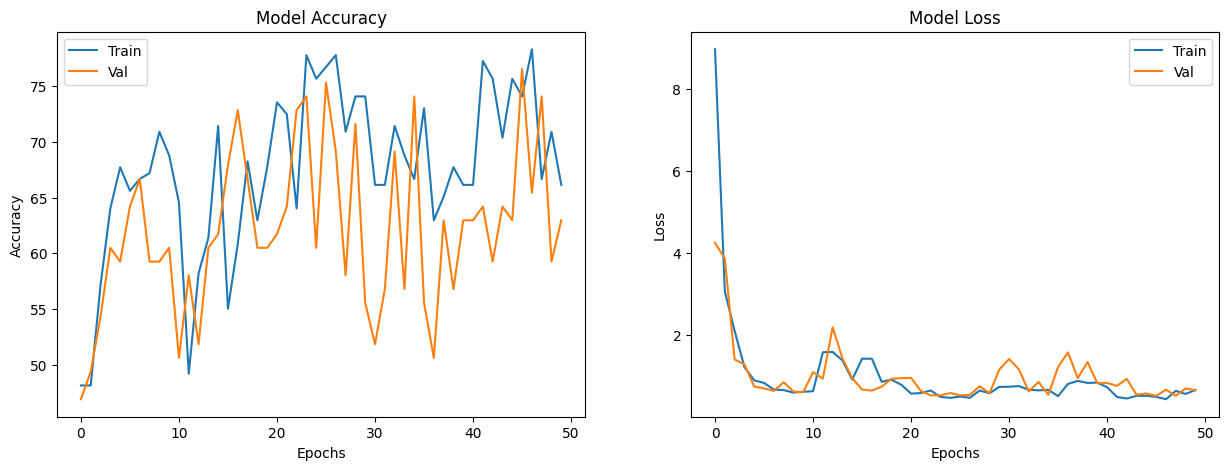


Training with Learning Rate: 0.0001, Hidden Size: 128
Epoch 1/50, Train Loss: 4.1678, Train Acc: 44.97%, Val Loss: 1.9054, Val Acc: 46.91%
Epoch 2/50, Train Loss: 1.1952, Train Acc: 47.62%, Val Loss: 1.2298, Val Acc: 53.09%
Epoch 3/50, Train Loss: 1.4587, Train Acc: 55.56%, Val Loss: 1.0994, Val Acc: 53.09%
Epoch 4/50, Train Loss: 0.9801, Train Acc: 54.50%, Val Loss: 0.8067, Val Acc: 51.85%
Epoch 5/50, Train Loss: 0.8426, Train Acc: 46.56%, Val Loss: 0.8514, Val Acc: 50.62%
Epoch 6/50, Train Loss: 0.7353, Train Acc: 56.08%, Val Loss: 0.6614, Val Acc: 60.49%
Epoch 7/50, Train Loss: 0.6583, Train Acc: 66.67%, Val Loss: 0.6398, Val Acc: 60.49%
Epoch 8/50, Train Loss: 0.5988, Train Acc: 67.20%, Val Loss: 0.6546, Val Acc: 60.49%
Epoch 9/50, Train Loss: 0.5871, Train Acc: 69.31%, Val Loss: 0.6401, Val Acc: 58.02%
Epoch 10/50, Train Loss: 0.5773, Train Acc: 68.78%, Val Loss: 0.6368, Val Acc: 60.49%
Epoch 11/50, Train Loss: 0.5770, Train Acc: 71.43%, Val Loss: 0.6554, Val Acc: 59.26%
Epoch 12

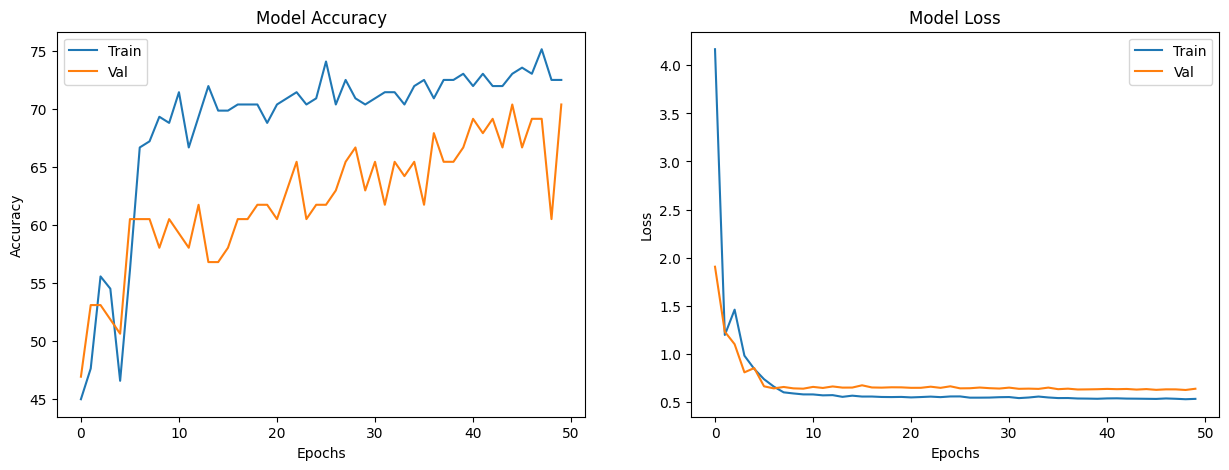


Training with Learning Rate: 0.0001, Hidden Size: 256
Epoch 1/50, Train Loss: 4.4374, Train Acc: 41.27%, Val Loss: 2.5846, Val Acc: 53.09%
Epoch 2/50, Train Loss: 2.6154, Train Acc: 54.50%, Val Loss: 0.8745, Val Acc: 48.15%
Epoch 3/50, Train Loss: 1.4052, Train Acc: 44.44%, Val Loss: 1.0737, Val Acc: 46.91%
Epoch 4/50, Train Loss: 1.0969, Train Acc: 48.68%, Val Loss: 0.9993, Val Acc: 53.09%
Epoch 5/50, Train Loss: 0.8892, Train Acc: 53.97%, Val Loss: 0.9866, Val Acc: 48.15%
Epoch 6/50, Train Loss: 0.6672, Train Acc: 67.20%, Val Loss: 0.8117, Val Acc: 55.56%
Epoch 7/50, Train Loss: 0.6641, Train Acc: 64.02%, Val Loss: 0.7698, Val Acc: 64.20%
Epoch 8/50, Train Loss: 0.6334, Train Acc: 67.72%, Val Loss: 0.6886, Val Acc: 56.79%
Epoch 9/50, Train Loss: 0.5899, Train Acc: 67.72%, Val Loss: 0.6909, Val Acc: 59.26%
Epoch 10/50, Train Loss: 0.5873, Train Acc: 70.90%, Val Loss: 0.6479, Val Acc: 58.02%
Epoch 11/50, Train Loss: 0.5818, Train Acc: 70.90%, Val Loss: 0.6456, Val Acc: 64.20%
Epoch 12

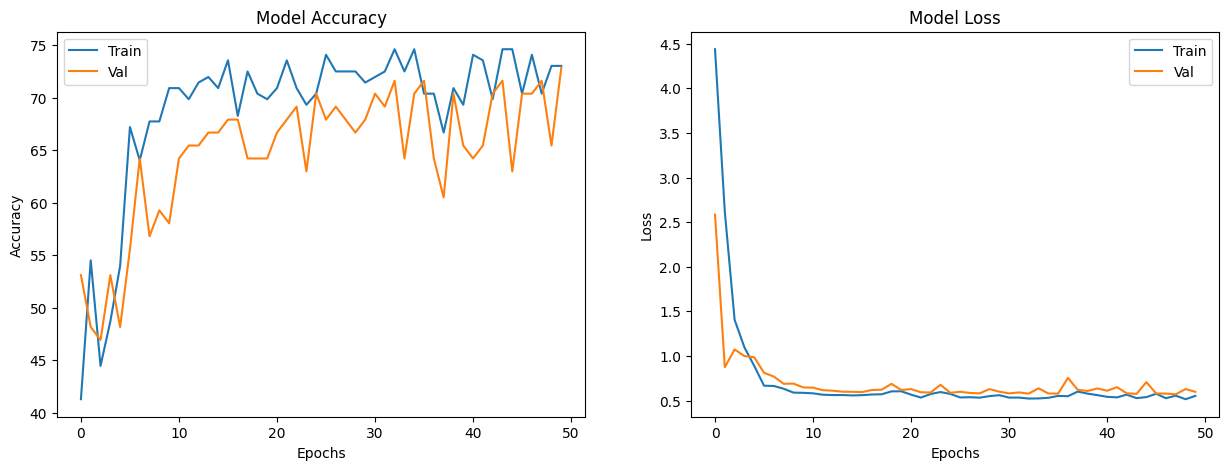


Training with Learning Rate: 0.0001, Hidden Size: 512
Epoch 1/50, Train Loss: 3.0213, Train Acc: 44.44%, Val Loss: 1.6491, Val Acc: 53.09%
Epoch 2/50, Train Loss: 1.8934, Train Acc: 52.91%, Val Loss: 1.8878, Val Acc: 46.91%
Epoch 3/50, Train Loss: 1.1837, Train Acc: 53.44%, Val Loss: 1.0982, Val Acc: 56.79%
Epoch 4/50, Train Loss: 0.8414, Train Acc: 62.43%, Val Loss: 0.9514, Val Acc: 56.79%
Epoch 5/50, Train Loss: 0.6744, Train Acc: 68.78%, Val Loss: 0.7617, Val Acc: 58.02%
Epoch 6/50, Train Loss: 0.6227, Train Acc: 67.20%, Val Loss: 0.6627, Val Acc: 59.26%
Epoch 7/50, Train Loss: 0.6257, Train Acc: 71.43%, Val Loss: 0.6627, Val Acc: 60.49%
Epoch 8/50, Train Loss: 0.5506, Train Acc: 71.96%, Val Loss: 0.5899, Val Acc: 62.96%
Epoch 9/50, Train Loss: 0.5976, Train Acc: 70.37%, Val Loss: 0.5883, Val Acc: 62.96%
Epoch 10/50, Train Loss: 0.5868, Train Acc: 66.67%, Val Loss: 0.6062, Val Acc: 70.37%
Epoch 11/50, Train Loss: 0.5648, Train Acc: 69.84%, Val Loss: 0.6398, Val Acc: 61.73%
Epoch 12

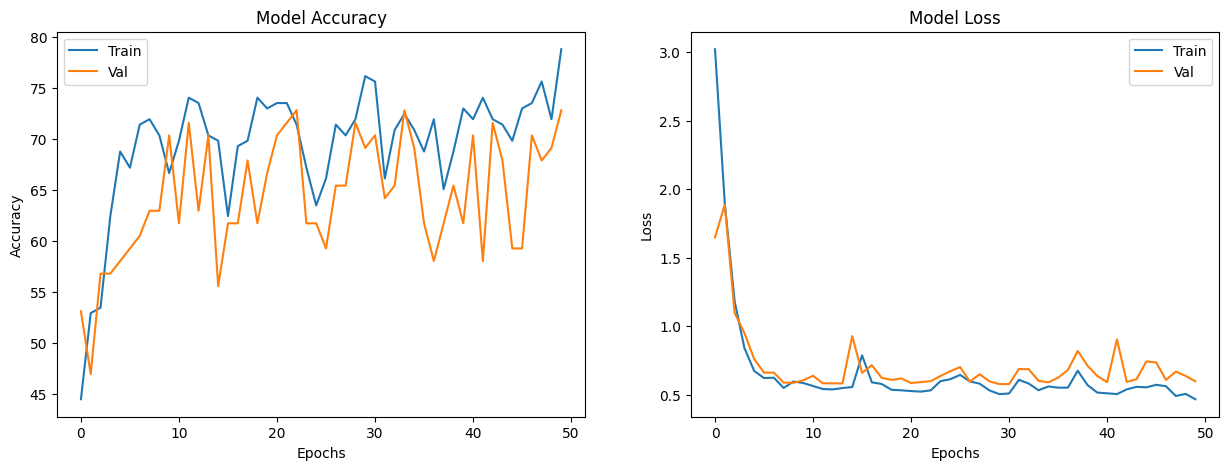

   Learning Rate  Hidden Size  Train Acc    Val Acc   Test Acc
0         0.0010          128  77.248677  60.493827  58.064516
1         0.0010          256  79.894180  79.012346  70.967742
2         0.0010          512  73.015873  58.024691  48.387097
3         0.0005          128  75.132275  66.666667  64.516129
4         0.0005          256  77.248677  75.308642  74.193548
5         0.0005          512  66.137566  62.962963  70.967742
6         0.0001          128  72.486772  70.370370  67.741935
7         0.0001          256  73.015873  72.839506  61.290323
8         0.0001          512  78.835979  72.839506  61.290323


In [36]:
# experiment of different para on training validating and testing

import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

# 定義超參數組合
learning_rates = [0.001, 0.0005, 0.0001]
hidden_sizes = [128, 256, 512]
epochs = 50  # 減少訓練時間

results = []

for lr in learning_rates:
    for hidden_size in hidden_sizes:
        print(f"\nTraining with Learning Rate: {lr}, Hidden Size: {hidden_size}")

        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []

        # 初始化模型
        model = Model(hidden_size=hidden_size)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)

        # 訓練模型
        for epoch in range(epochs):
            model.train()
            total_loss = 0.0
            train_correct = 0
            total_train_samples = 0

            for features, labels in train_loader:
                features = features.cuda()
                labels = labels.cuda()

                outputs = model(features)
                loss = criterion(outputs, labels)
                total_loss += loss.item()

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                train_predicted = outputs.argmax(-1)
                train_correct += (train_predicted == labels).sum().item()
                total_train_samples += labels.size(0)

            avg_train_loss = total_loss / len(train_loader)
            train_accuracy = 100. * train_correct / total_train_samples

            # 驗證模型
            model.eval()
            total_val_loss = 0.0
            val_correct = 0
            total_val_samples = 0

            with torch.no_grad():
                for features, labels in val_loader:
                    features = features.cuda()
                    labels = labels.cuda()

                    outputs = model(features)
                    loss = criterion(outputs, labels)
                    total_val_loss += loss.item()

                    val_predicted = outputs.argmax(-1)
                    val_correct += (val_predicted == labels).sum().item()
                    total_val_samples += labels.size(0)

            avg_val_loss = total_val_loss / len(val_loader)
            val_accuracy = 100. * val_correct / total_val_samples

            print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

            # Store performance
            train_losses.append(avg_train_loss)
            train_accuracies.append(train_accuracy)
            val_losses.append(avg_val_loss)
            val_accuracies.append(val_accuracy)

        # Show Plot
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))

        # Plotting training and validation accuracy
        ax[0].plot(train_accuracies)
        ax[0].plot(val_accuracies)
        ax[0].set_title('Model Accuracy')
        ax[0].set_xlabel('Epochs')
        ax[0].set_ylabel('Accuracy')
        ax[0].legend(['Train', 'Val'])

        # Plotting training and validation loss
        ax[1].plot(train_losses)
        ax[1].plot(val_losses)
        ax[1].set_title('Model Loss')
        ax[1].set_xlabel('Epochs')
        ax[1].set_ylabel('Loss')
        ax[1].legend(['Train', 'Val'])

        plt.show()


        # 測試模型

        test_correct = 0
        test_total = 0
        with torch.no_grad():
            for features, labels in test_loader:
                features = features.cuda()
                labels = labels.cuda()
                outputs = model(features)
                predicted = outputs.argmax(-1)
                test_correct += (predicted == labels).sum().item()
                test_total += labels.size(0)

        test_accuracy = 100. * test_correct / test_total

        # 儲存結果
        results.append({
            "Learning Rate": lr,
            "Hidden Size": hidden_size,
            "Train Acc": train_accuracy,
            "Val Acc": val_accuracy,
            "Test Acc": test_accuracy
        })

# 轉換為 DataFrame 以便顯示
import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)


#### Visualizing the model performance

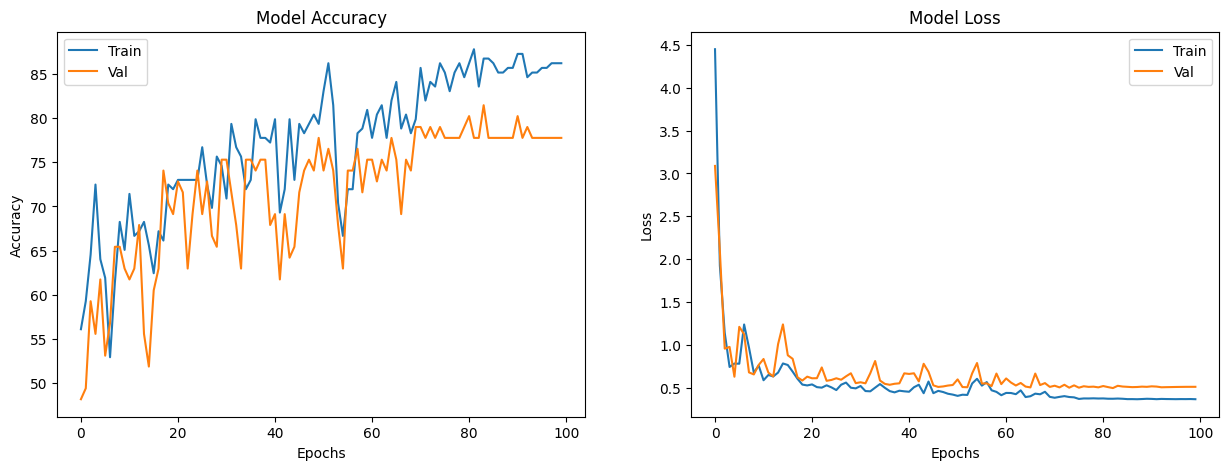

In [34]:
# original plotting training and validating now please skip

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()

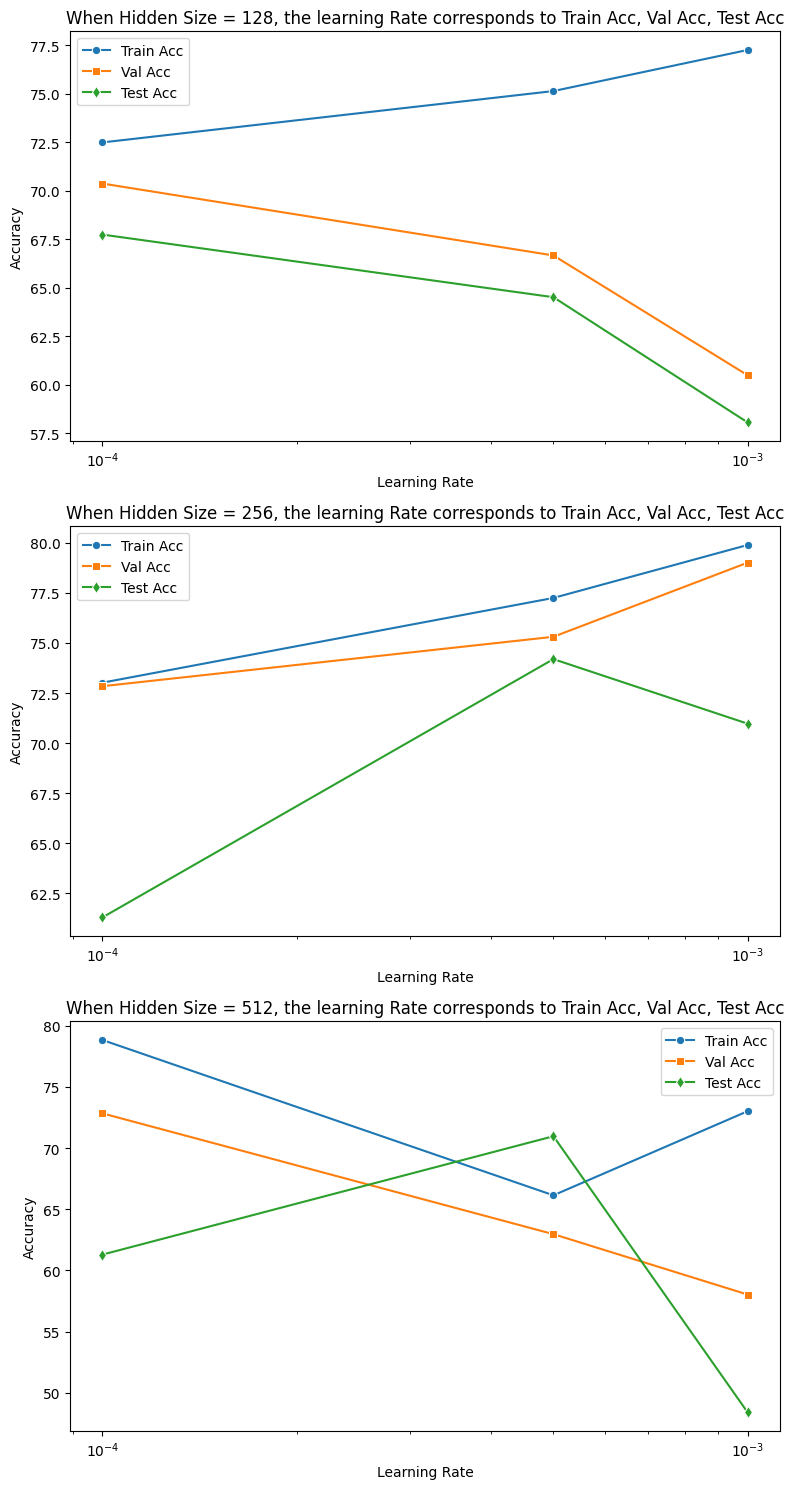

In [38]:
# When Hidden Size = {hs}, the learning Rate corresponds to Train Acc, Val Acc, Test Acc
import matplotlib.pyplot as plt
import seaborn as sns

# 設定不同的 Hidden Size
hidden_sizes = [128, 256, 512]

# 建立子圖 (3 rows, 1 column)
fig, axes = plt.subplots(3, 1, figsize=(8, 15))

# 依序繪製三張圖
for i, hs in enumerate(hidden_sizes):
    ax = axes[i]

    # 篩選特定 Hidden Size 的資料
    df_filtered = df_results[df_results["Hidden Size"] == hs]

    # 繪製折線圖
    sns.lineplot(data=df_filtered, x="Learning Rate", y="Train Acc", marker="o", label="Train Acc", ax=ax)
    sns.lineplot(data=df_filtered, x="Learning Rate", y="Val Acc", marker="s", label="Val Acc", ax=ax)
    sns.lineplot(data=df_filtered, x="Learning Rate", y="Test Acc", marker="d", label="Test Acc", ax=ax)

    # 設定標題
    ax.set_title(f"When Hidden Size = {hs}, the learning Rate corresponds to Train Acc, Val Acc, Test Acc")
    ax.set_xlabel("Learning Rate")
    ax.set_ylabel("Accuracy")
    ax.legend()
    ax.set_xscale("log")  # 如果 Learning Rate 為指數形式，可設為對數尺度

# 自動調整排版
plt.tight_layout()
plt.show()


## D. Evaluating Your Trained Model

In [21]:
# read test file
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NTHU_2025_DLIA_HW/HW2/heart_dataset_test.csv')
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
1,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
2,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
3,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
4,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1


In [22]:
test_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [23]:
test_data = test_data.values
test_data.shape

(31, 14)

In [24]:
# Convert to PyTorch tensors
x_test = torch.from_numpy(test_data[:, :13]).float()
y_test = torch.from_numpy(test_data[:, 13]).long()

# Create datasets
test_dataset = TensorDataset(x_test, y_test)

# Create dataloaders
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [25]:
# Load the trained weights
model.load_state_dict(torch.load('model_classification.pth'))

# Set the model to evaluation mode
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad():
    for features, labels in test_loader:

        features = features.cuda()
        labels = labels.cuda()

        outputs = model(features)

        predicted = outputs.argmax(-1)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total}%')

Test accuracy is 64.51612903225806%


前面沒有寫Test loader所以這邊要先跑，沒有跑model eval()不知道會不會怎樣還沒試，總之結果已經有了